#  1. Install & Import Libraries

In [145]:
!pip install ultralytics opencv-python roboflow torch torchvision torchaudio --quiet

In [146]:
import torch
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow

# 2. Download Dataset from Roboflow

In [148]:
rf = Roboflow(api_key="3CfE8MKsmkuurTocaGGu")
project = rf.workspace("srilakshmi-xc4n0").project("parking-space-detection-ivq57")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


# 3. Train YOLOv8 Model

In [149]:
model = YOLO("yolov8n.pt")
model.train(data=f"{dataset.location}/data.yaml", epochs=20, imgsz=640)

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Parking-space-Detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

train: Scanning /kaggle/working/Parking-space-Detection-3/train/labels.cache... 7824 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7824/7824 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 819.8±569.9 MB/s, size: 66.3 KB)


val: Scanning /kaggle/working/Parking-space-Detection-3/valid/labels.cache... 1093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1093/1093 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.77G      1.449      1.241      1.087       1344        640: 100%|██████████| 489/489 [01:46<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.51it/s]


                   all       1093      64732      0.957      0.957      0.965      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.57G      1.005     0.6158     0.9226       1567        640: 100%|██████████| 489/489 [01:43<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.57it/s]


                   all       1093      64732      0.968      0.962      0.984      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.24G     0.8799     0.5356     0.8919       1713        640: 100%|██████████| 489/489 [01:42<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


                   all       1093      64732      0.969      0.968      0.987      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.24G     0.8064     0.4893     0.8747       1283        640: 100%|██████████| 489/489 [01:41<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]


                   all       1093      64732       0.97      0.968      0.982      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.24G     0.7489      0.456     0.8608       1621        640: 100%|██████████| 489/489 [01:40<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


                   all       1093      64732      0.977       0.98      0.992       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.24G     0.6974     0.4303     0.8506        990        640: 100%|██████████| 489/489 [01:41<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]


                   all       1093      64732      0.977      0.979      0.991      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.05G      0.666     0.4107     0.8438       1514        640: 100%|██████████| 489/489 [01:41<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.05it/s]

                   all       1093      64732      0.968      0.978       0.99      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.05G     0.6391     0.3973     0.8395       1046        640: 100%|██████████| 489/489 [01:41<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.08it/s]

                   all       1093      64732      0.984       0.97      0.991      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.05G     0.6172     0.3865     0.8356       1194        640: 100%|██████████| 489/489 [01:41<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.98it/s]

                   all       1093      64732      0.982      0.982      0.992      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.05G     0.6047     0.3765     0.8331       1500        640: 100%|██████████| 489/489 [01:41<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       1093      64732      0.981      0.984      0.993        0.9


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.05G     0.5282     0.3369     0.8192        841        640: 100%|██████████| 489/489 [01:28<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       1093      64732      0.989       0.99      0.993      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.05G     0.4879     0.3094     0.8108        946        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all       1093      64732       0.99      0.992      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.05G      0.471     0.2987     0.8079        930        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       1093      64732      0.991      0.991      0.993      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.05G     0.4515     0.2862     0.8039        763        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.10it/s]

                   all       1093      64732      0.992      0.992      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.05G     0.4312     0.2735     0.8006       1070        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       1093      64732      0.996      0.996      0.994      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.05G     0.4172     0.2635     0.7988        953        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all       1093      64732      0.996      0.995      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.05G     0.4025     0.2557     0.7957       1098        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all       1093      64732      0.996      0.996      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.05G     0.3849     0.2483     0.7927        893        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       1093      64732      0.995      0.995      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.05G     0.3723     0.2414     0.7912        719        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       1093      64732      0.997      0.996      0.994      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.05G     0.3582     0.2349     0.7891        997        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all       1093      64732      0.997      0.997      0.994      0.964



20 epochs completed in 0.579 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 2/35 [00:00<00:11,  2.85it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.71it/s]
invalid value encountered in less
invalid value encountered in less


                   all       1093      64732      0.997      0.964      0.975      0.946
           space-empty        950      33382      0.996      0.975      0.981      0.959
        space-occupied        887      31350      0.997      0.952       0.97      0.933
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785442439c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# 4. Load Trained Model and Run Inference on Image

In [150]:
model = YOLO("runs/detect/train/weights/best.pt")
results = model(train_image_path)[0]


image 1/1 /kaggle/working/Parking-space-Detection-3/train/images/2012-09-11_15_16_58_jpg.rf.ccc5d7a9c86f164663964cd39f88d60a.jpg: 640x640 33 space-emptys, 68 space-occupieds, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


# 5. Helper Functions to Detect Slot Status

In [151]:
def iou(boxA, boxB):
    boxA = torch.tensor(boxA, dtype=torch.float)
    boxB = torch.tensor(boxB, dtype=torch.float)
    xA = torch.max(boxA[0], boxB[0])
    yA = torch.max(boxA[1], boxB[1])
    xB = torch.min(boxA[2], boxB[2])
    yB = torch.min(boxA[3], boxB[3])
    inter = torch.clamp(xB - xA, min=0) * torch.clamp(yB - yA, min=0)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    return inter / (boxAArea + boxBArea - inter + 1e-6)

In [152]:
def check_slots(detections, frame, SLOTS):
    status = {}
    for sid, sbox in SLOTS.items():
        occupied = any(iou(sbox, d) > 0.3 for d in detections)
        color = (0, 0, 255) if occupied else (0, 255, 0)

        # Draw rectangle for parking slot
        cv2.rectangle(frame, tuple(sbox[:2]), tuple(sbox[2:]), color, 2)

        # Dynamically set label position: above top-left corner of slot, with margin
        label_x = sbox[0]
        label_y = max(sbox[1] - 10, 10)

        cv2.putText(frame, f"Slot {sid}: {'occupied' if occupied else 'vacant'}",
                    (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, color, 2, lineType=cv2.LINE_AA)
        
        status[sid] = "occupied" if occupied else "vacant"

    return frame, status

# 6. Detection on Train Image

In [153]:
!ls /kaggle/working/Parking-space-Detection-3/train/images | head -n 5

2012-09-11_15_16_58_jpg.rf.ccc5d7a9c86f164663964cd39f88d60a.jpg
2012-09-11_15_27_08_jpg.rf.68f71e75d4c2ba812bf2a9233dc15ec0.jpg
2012-09-11_15_29_29_jpg.rf.0a308d09d61f039c24bc8ee42ca1ef80.jpg
2012-09-11_15_31_50_jpg.rf.7c3b496280d42d20d639dd834cfa6fd7.jpg
2012-09-11_15_38_53_jpg.rf.e00e8104c387c4ce3566f35325aa284b.jpg
ls: write error: Broken pipe


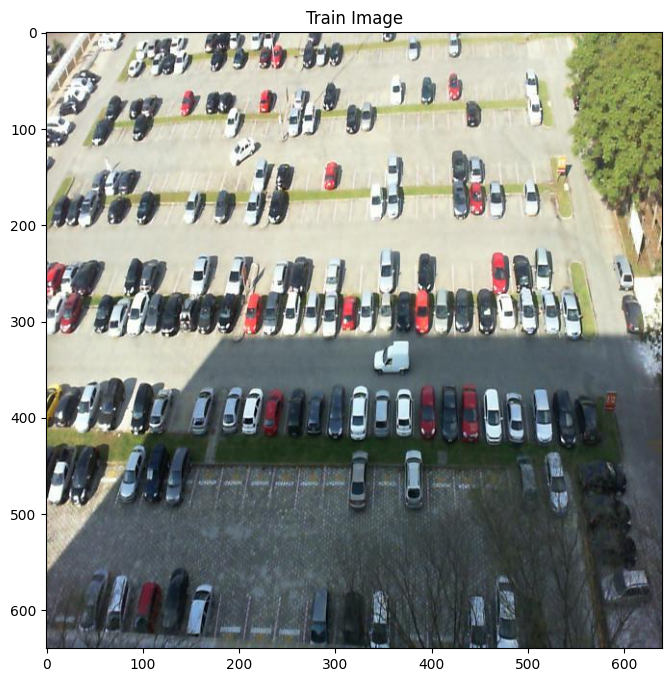

In [154]:
# Path to the image
train_image_path = "/kaggle/working/Parking-space-Detection-3/train/images/2012-09-11_15_16_58_jpg.rf.ccc5d7a9c86f164663964cd39f88d60a.jpg"

# Read the image using OpenCV (BGR format)
train_image = cv2.imread(train_image_path)

# Convert BGR to RGB for correct display with matplotlib
train_image_rgb = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(train_image_rgb)
plt.axis('on')
plt.title("Train Image")
plt.show()

In [155]:
Train_img_slots = {
    1: [180, 580, 210, 650],
    2: [285, 270, 305, 330],
    3: [390, 80, 400, 110],
}

In [156]:
train_frame = cv2.imread(train_image_path)
train_dets = [list(map(int, box.xyxy[0])) for box in results.boxes]
out_train_img, train_slot_status = check_slots(train_dets, train_frame, Train_img_slots)

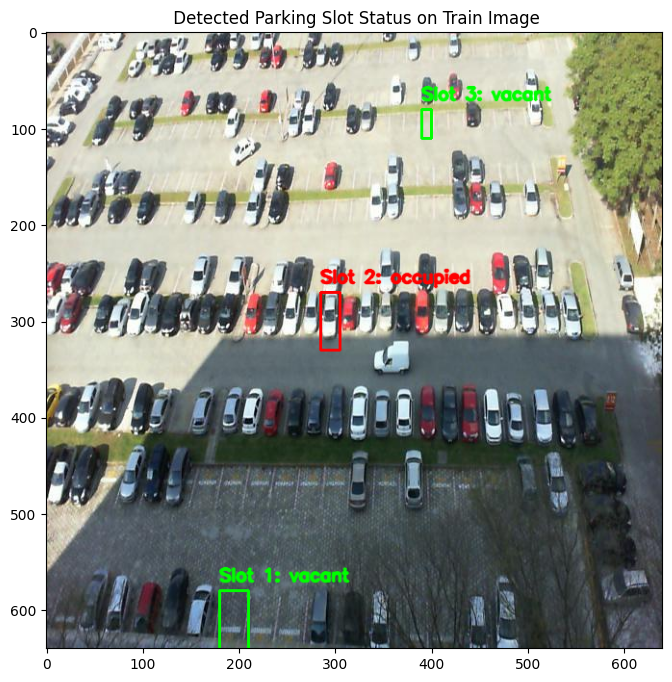

In [157]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(out_train_img, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.title(" Detected Parking Slot Status on Train Image")
plt.show()

# 7. Detection on Test Image

In [158]:
!ls /kaggle/working/Parking-space-Detection-3/test/images | head -n 5

2012-09-11_15_53_00_jpg.rf.82a9d0ed8079c7504a078ed4a3c792d1.jpg
2012-09-11_16_48_36_jpg.rf.6752d40bfc2cce31dff24a0d4c26225c.jpg
2012-09-11_17_31_01_jpg.rf.48d3ec9891ed067b88b30894d2192367.jpg
2012-09-11_17_35_44_jpg.rf.757d652286ffa4d74edd6dfac7dfc3dc.jpg
2012-09-11_17_59_15_jpg.rf.1d99a3873cda838d4221653c8f00d94a.jpg
ls: write error: Broken pipe


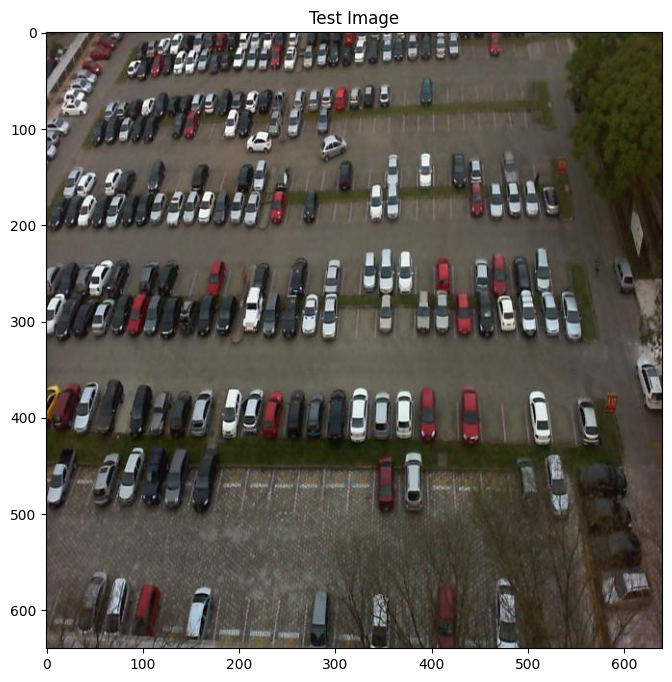

In [159]:
# Path to the image
test_image_path = "/kaggle/working/Parking-space-Detection-3/test/images/2012-09-11_17_59_15_jpg.rf.1d99a3873cda838d4221653c8f00d94a.jpg"

# Read the image using OpenCV (BGR format)
test_image = cv2.imread(test_image_path)

# Convert BGR to RGB for correct display with matplotlib
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(test_image_rgb)
plt.axis('on')
plt.title("Test Image")
plt.show()

In [160]:
Test_img_slots = {
    1: [150, 450, 170, 500],
    2: [140, 240, 150, 270],
    3: [330, 160, 350, 205],
}

In [161]:
test_frame = cv2.imread(test_image_path)
test_dets = [list(map(int, box.xyxy[0])) for box in results.boxes]
out_test_img, test_slot_status = check_slots(test_dets, test_frame, Test_img_slots)

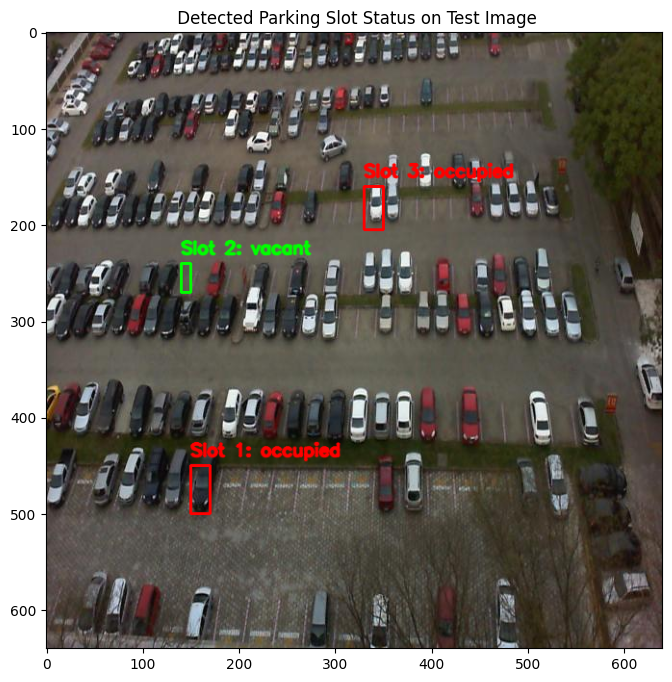

In [163]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(out_test_img, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.title(" Detected Parking Slot Status on Test Image")
plt.show()